# LINEAR REGRESSION ASSIGNMENT UPGRAD

## Data Loading and Understanding

Dataset(day.csv) contains the following fields:

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Download the data from source

In [299]:
!wget https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv

--2024-05-29 15:28:46--  https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv
Resolving ml-course2-upgrad.s3.amazonaws.com (ml-course2-upgrad.s3.amazonaws.com)... 3.5.20.172, 54.231.168.25, 52.217.42.148, ...
Connecting to ml-course2-upgrad.s3.amazonaws.com (ml-course2-upgrad.s3.amazonaws.com)|3.5.20.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57542 (56K) [text/csv]
Saving to: ‘day.csv.2’

day.csv.2           100%[===================>]  56.19K  --.-KB/s    in 0.1s    

2024-05-29 15:28:46 (459 KB/s) - ‘day.csv.2’ saved [57542/57542]



### Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Reading and Understanding the Dataset

In [2]:
#Load the dataset
bike_dataset = pd.read_csv('day.csv')
bike_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Understand the shape of the dataset
bike_dataset.shape

(730, 16)

In [4]:
#Understand the columns and it's type in the dataset
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Understanding the numerical values and it's statistics
bike_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Checking for any null values in the dataset.
bike_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

The dataset contains no null values.

In [7]:
bike_dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
dataset = bike_dataset.copy()

In [9]:
#Extract data from the dteday column and drop the columns dteday and instant.
dataset.drop(['dteday', 'instant', 'casual', 'registered'],axis=1, inplace=True)
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#List the categorical and numerical columns of the dataset.
dataset.columns
categroical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [11]:
dataset.season = dataset.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
dataset.mnth = dataset.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
dataset.weekday = dataset.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
dataset.weathersit = dataset.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dataset Analysis

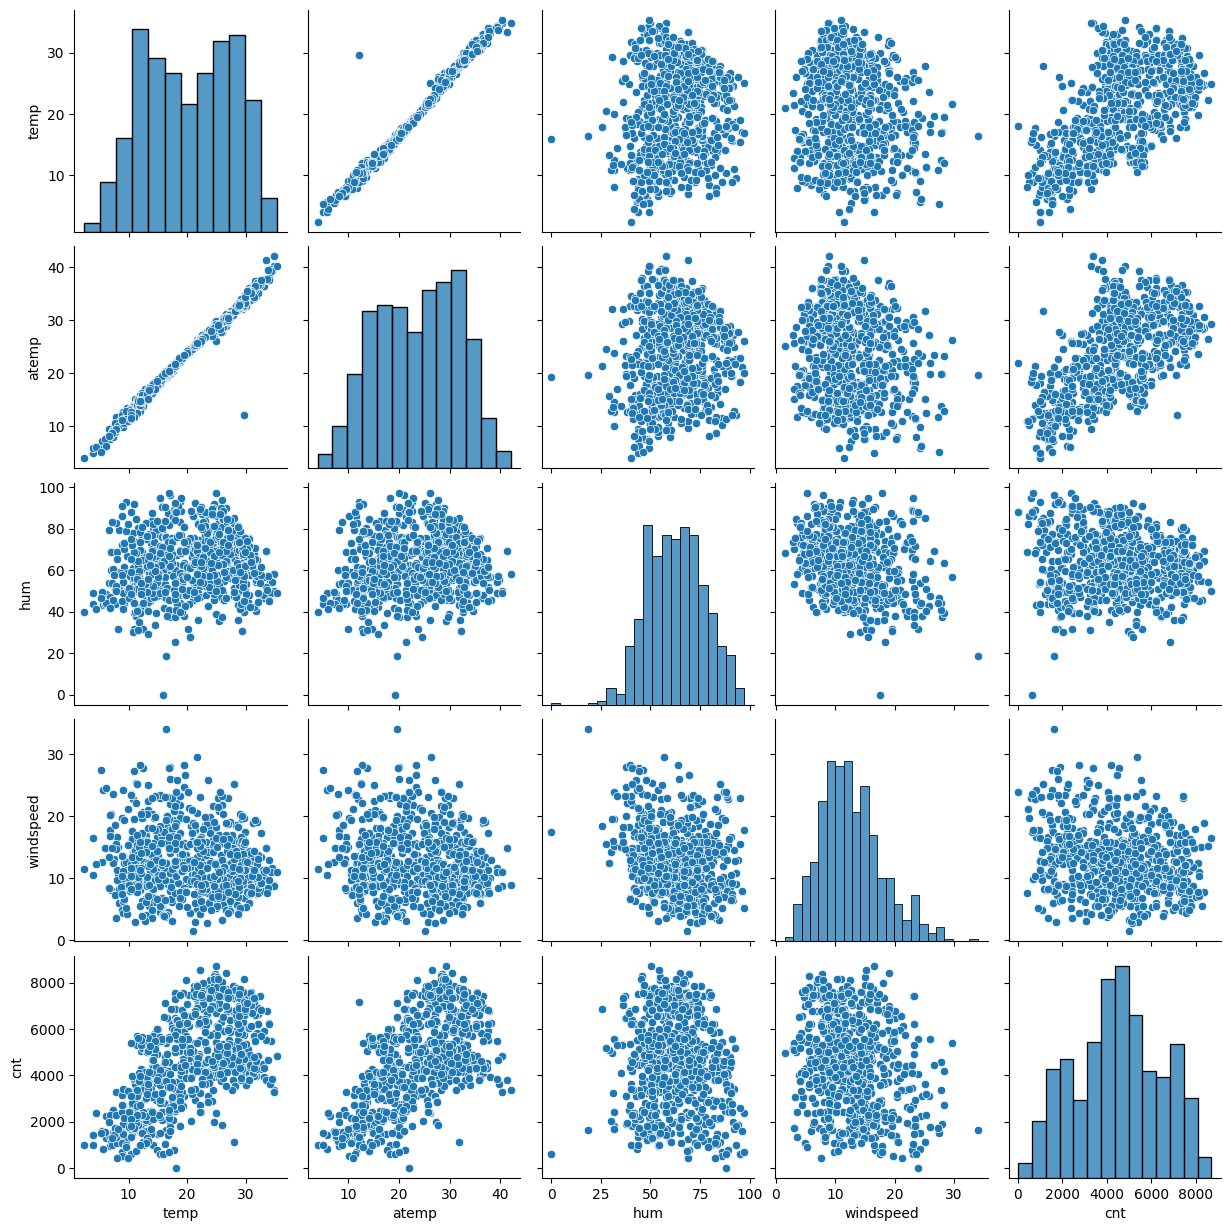

In [12]:
sns.pairplot(data=dataset[numerical_cols])

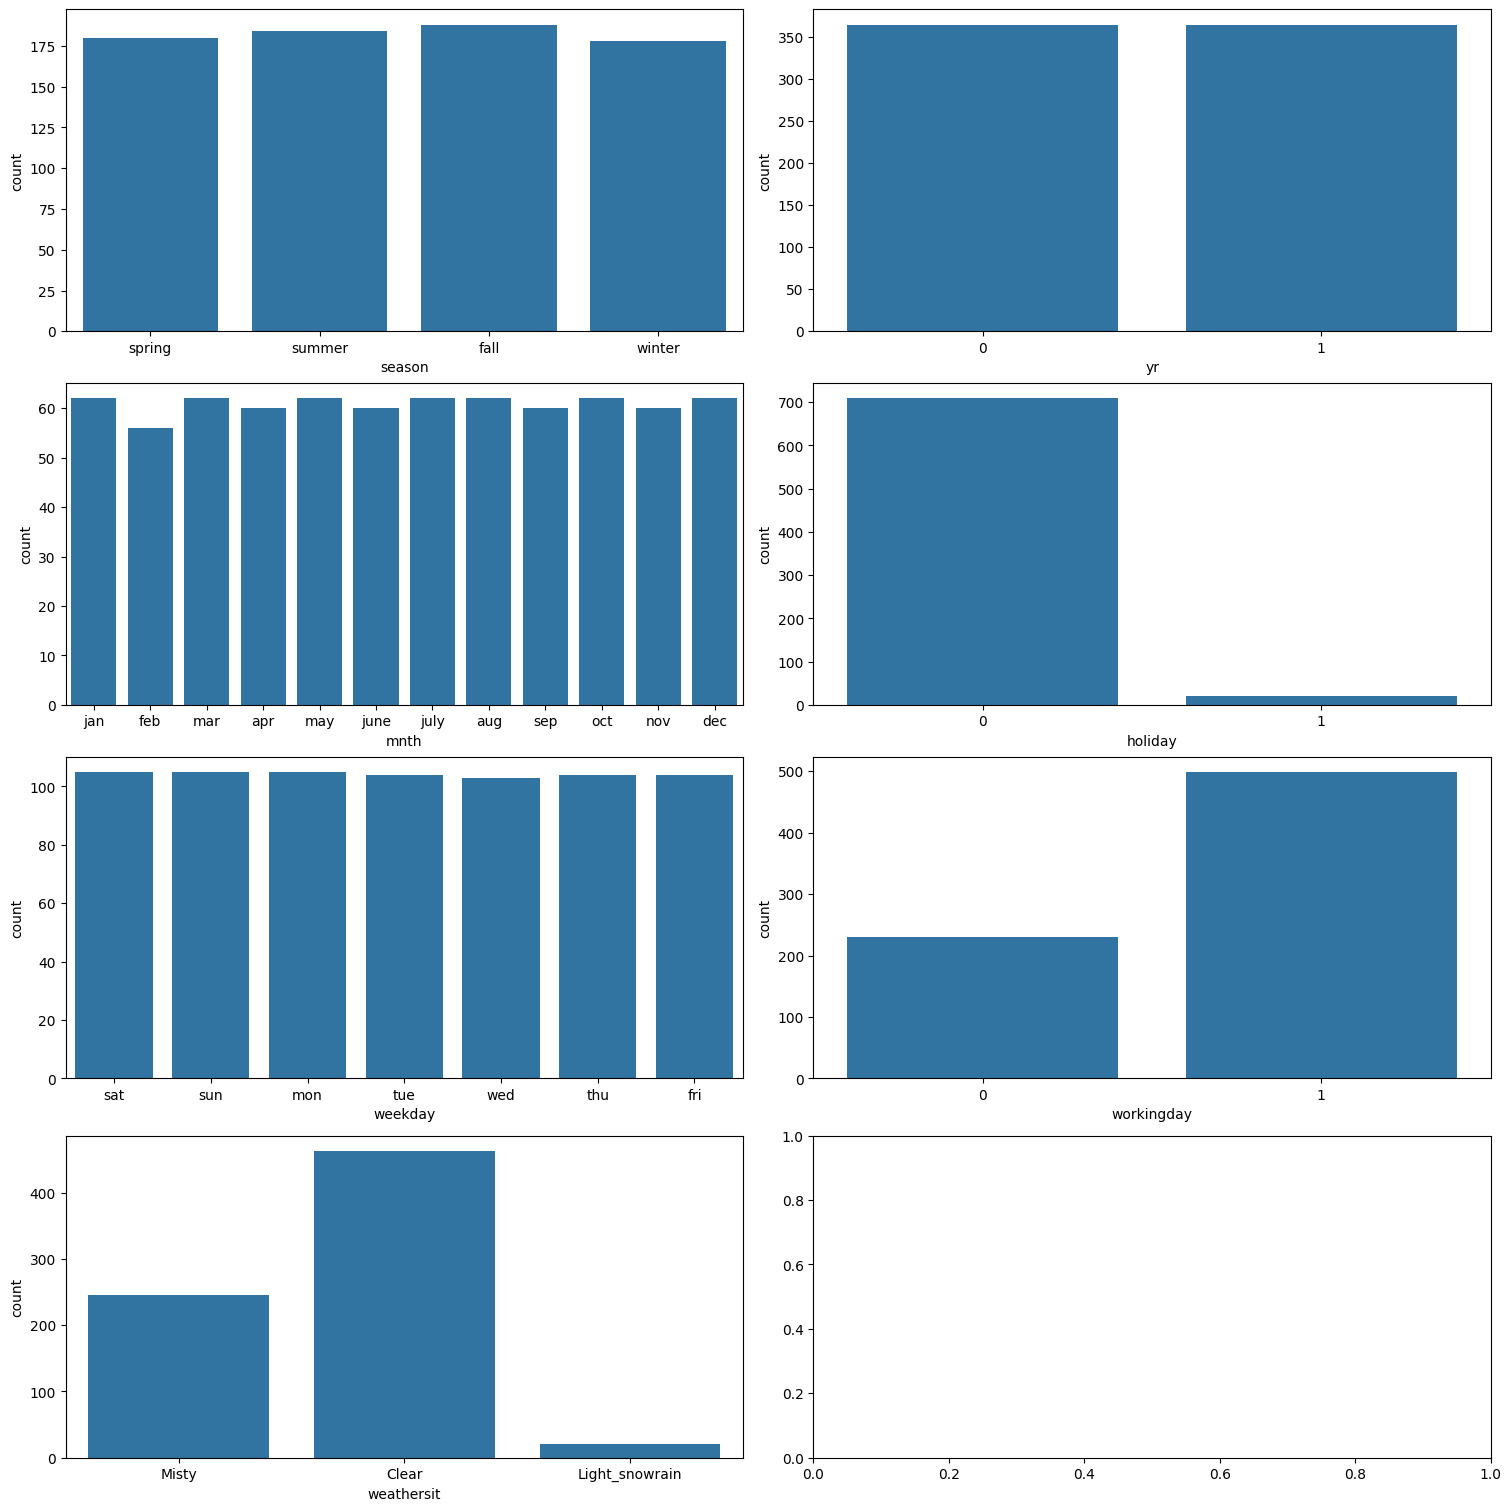

In [13]:
#Plotting the count plot of the categorical columns in the dataset.
fig, axes = plt.subplots(int(math.ceil(len(categroical_cols)/2)),2, figsize=[15, 15], constrained_layout=True)
for axis, colmn in enumerate(categroical_cols):
  plot = sns.countplot(data=dataset,x=colmn, ax=axes[axis//2,axis%2] )

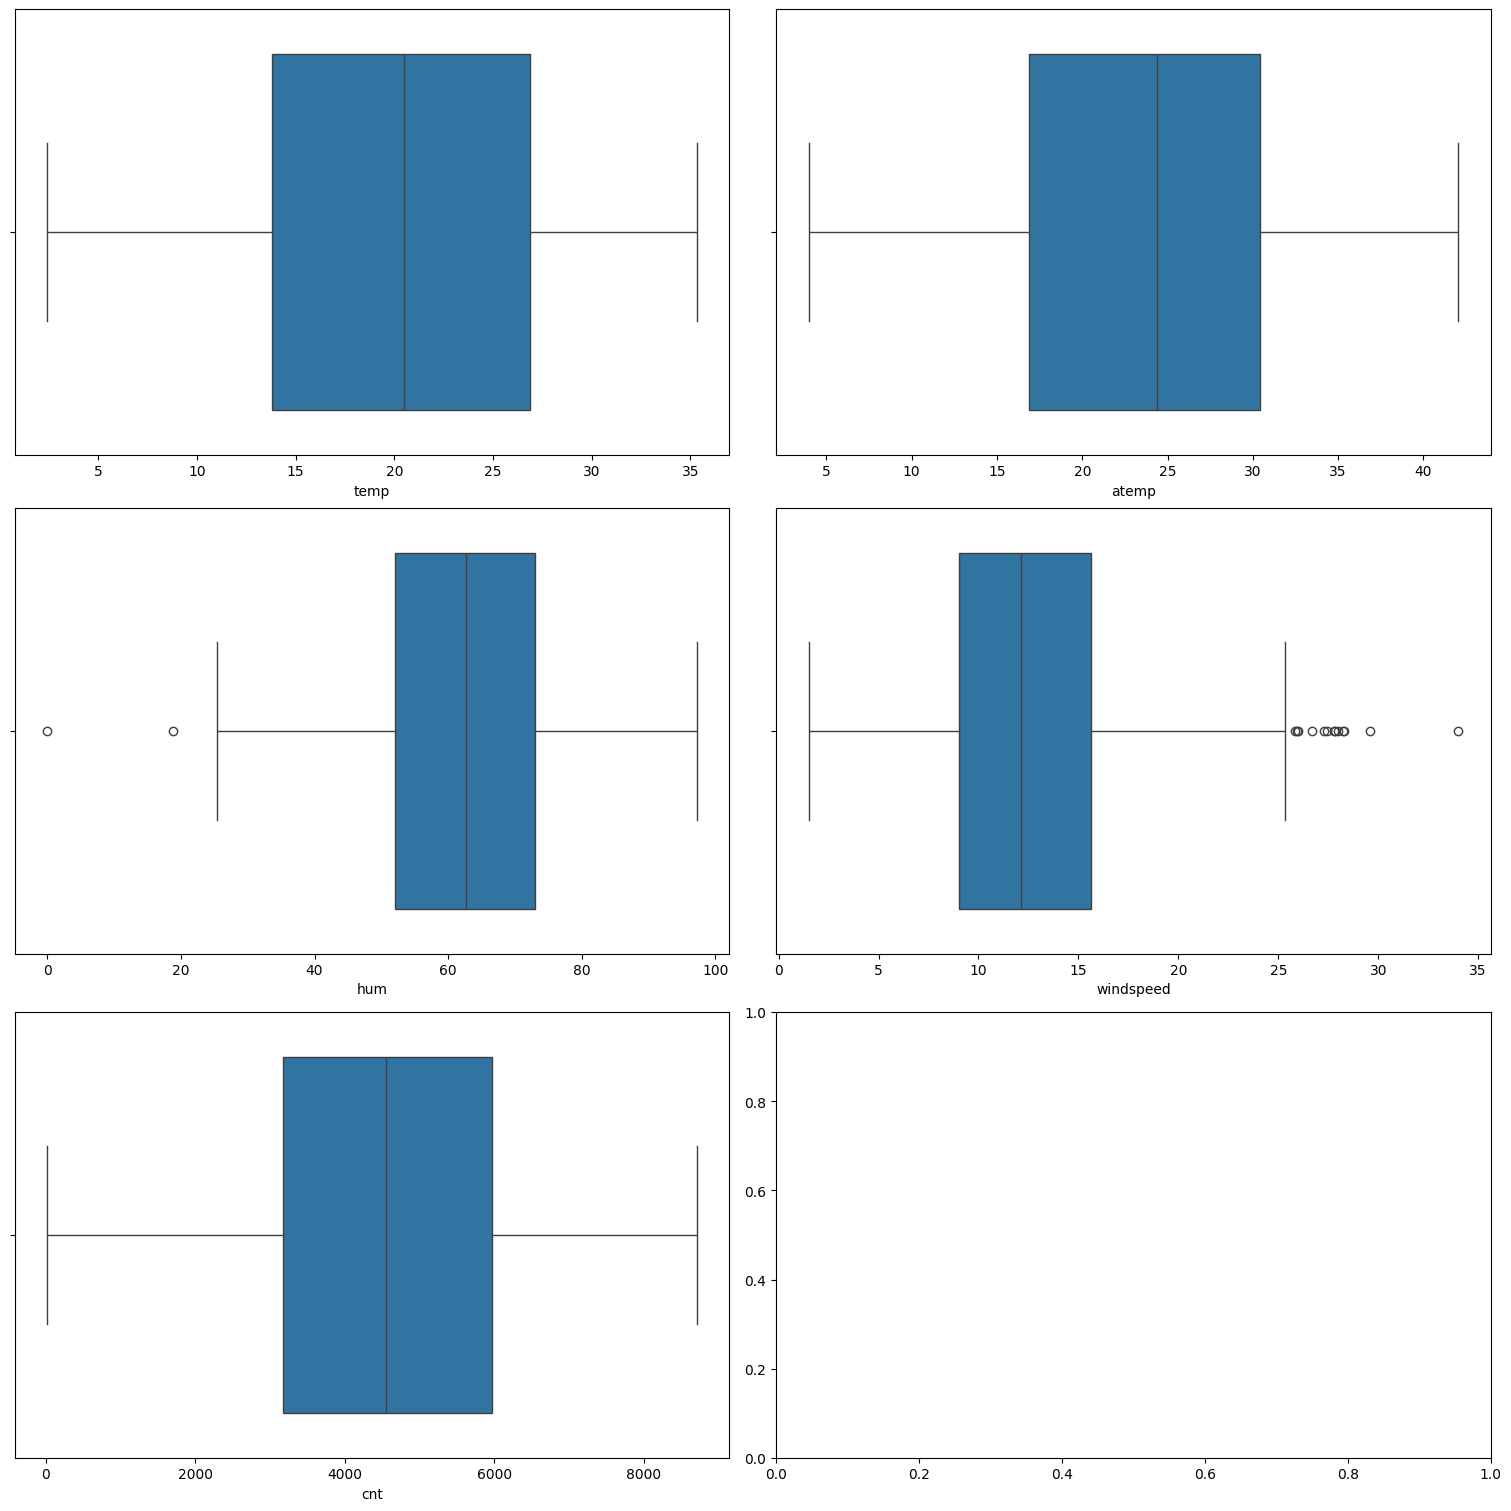

In [14]:
#Plotting the boxplot of all the numerical values in the dataset.
fig, axes = plt.subplots(int(math.ceil(len(numerical_cols)/2)),2, figsize=[15, 15], constrained_layout=True)
for axis, colmn in enumerate(numerical_cols):
  plot = sns.boxplot(data=dataset,x=colmn, ax=axes[axis//2,axis%2] )

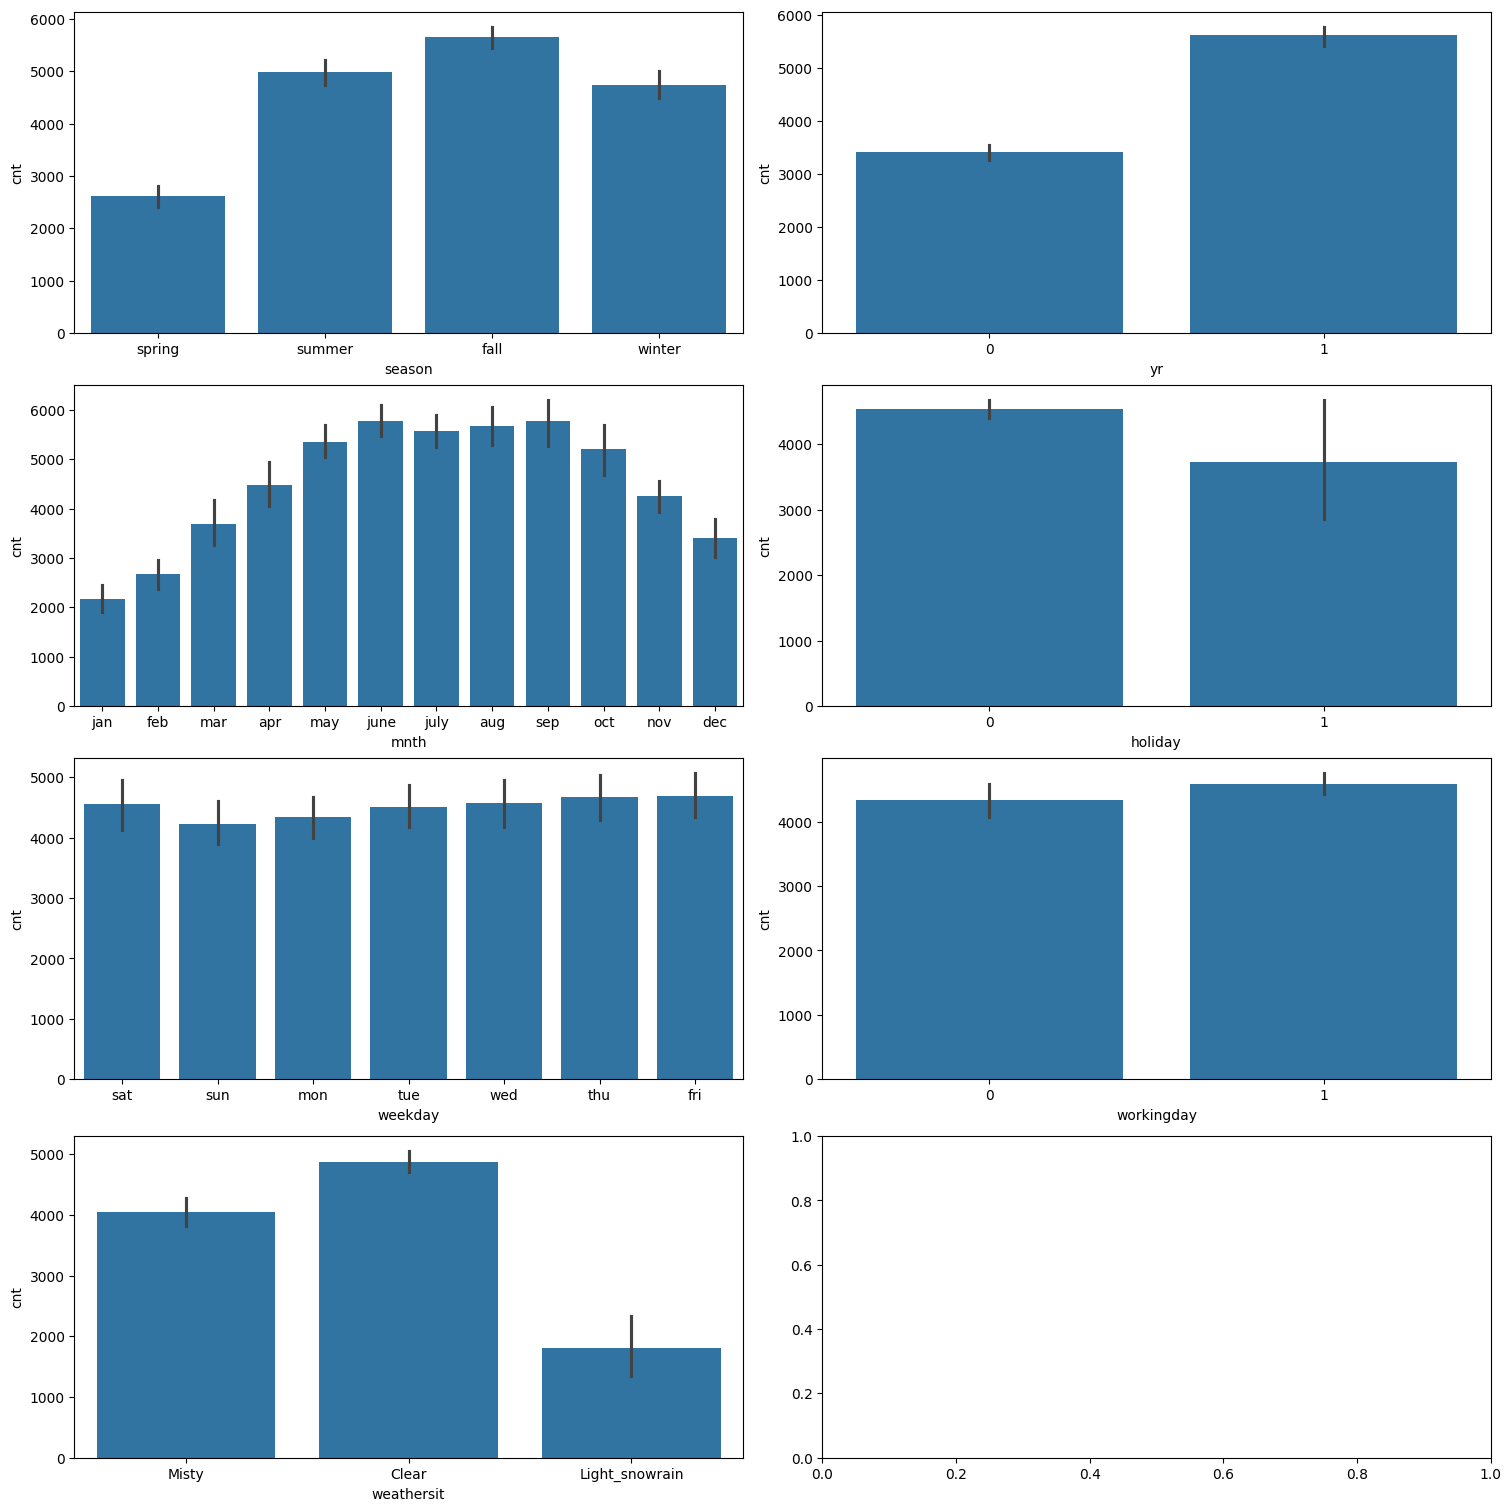

In [15]:
#Bivariate Analysis
#plotting the categorical values vs the cnt column.
fig, axes = plt.subplots(int(math.ceil(len(categroical_cols)/2)),2, figsize=[15, 15], constrained_layout=True)
for axis, colmn in enumerate(categroical_cols):
  plot = sns.barplot(data=dataset,x=colmn,y='cnt', ax=axes[axis//2,axis%2] )

<Axes: >

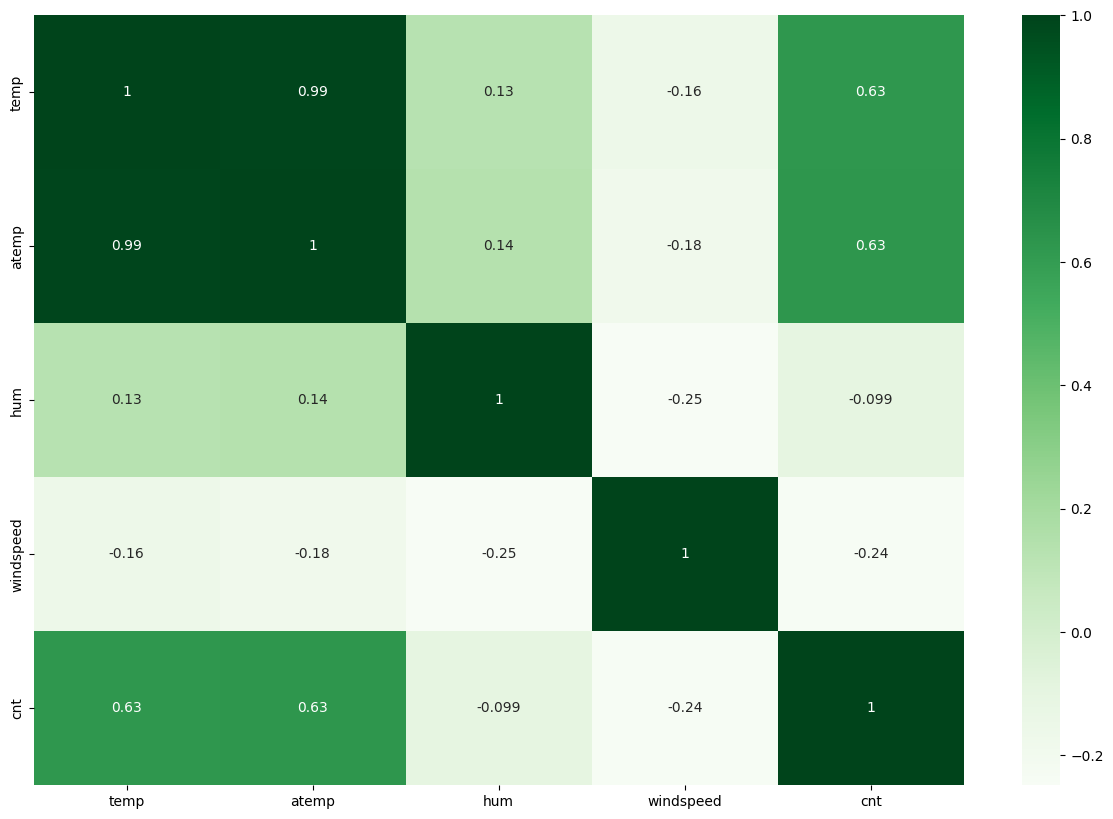

In [16]:
#Understanding any correlations between columns in the dataset.
plt.figure(figsize=(15,10))
sns.heatmap(data=dataset[numerical_cols].corr(), annot=True, cmap='Greens')

## Preparing the data for modeling

### Add categorical variables.

Convert categorical variables to onehotencoding values. This creates multiple columns. The drop the columns from which the onehot encoding was created.

In [17]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['weathersit'],drop_first=True, dtype='int')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['weekday'],drop_first=True, dtype='int')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['mnth'],drop_first=True,dtype='int')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['season'],drop_first=True, dtype='int')], axis=1)
dataset.drop(['weathersit', 'weekday', 'mnth', 'season'],axis=1, inplace=True)
dataset.shape
dataset.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_snowrain,Misty,...,july,june,mar,may,nov,oct,sep,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting the dataset to train and test.

In [36]:
#Split the dataset into 70-30 using the train test split function from sklearn.
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.shape, df_test.shape

((510, 30), (219, 30))

### Scaling the numerical values using minmax scaler.

In [19]:
scaler = MinMaxScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_snowrain,Misty,...,july,june,mar,may,nov,oct,sep,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,1,0,0,0,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# Extract the train and prediction values from the df_train split.
y_train=df_train.pop('cnt')
X_train=df_train

## Fitting the model and Identifying the right features.

In [21]:
#Fit the training datat of the Linear regression model from sklearn.
model_skl = LinearRegression()
model_skl.fit(X_train, y_train)

LinearRegression()

In [22]:
#Using the RFE(Recursive Feature Elimination) method eliminate the features that are not helpful in the model prediction.
rfe = RFE(model_skl, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [23]:
#RFE Output on the columns of the dataset.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 15),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 13),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1)]

In [24]:
# get rfe cols that have True mask
rfe_cols = df_train.columns[rfe.support_]
rfe_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Light_snowrain', 'Misty', 'sat', 'sun', 'july', 'sep', 'spring',
       'winter'],
      dtype='object')

In [25]:
#Observing the columns that have been rejected.
X_train.columns[~rfe.support_]

Index(['mon', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb', 'jan', 'june', 'mar',
       'may', 'nov', 'oct', 'summer'],
      dtype='object')

### Dropping Columsn and Performing feature selection.

In [26]:
#Add constant to the datatset.
X_train_sm = sm.add_constant(X_train[rfe_cols])

#Fit the data on the model.
lm = sm.OLS(y_train, X_train_sm[rfe_cols]).fit()

#Obtain the summary of the model.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.74e-189
Time:                        15:31:35   Log-Likelihood:                 511.86
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     495   BIC:                            -930.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
yr                 0.2308      0.008     28.473      0.000       0.215       0.247
holiday            0.2323      0.040      5.835      0.000       0.154       0.310
workingday         0.3346      0.031     10.800      0.000       0.274       0.396
temp               0.3670      0.128      2.857      0.004       0.115       0.619
atemp              0.1208      0.135      0.896      0.371      -0.144       0.386
hum               -0.1489      0.038     -3.948      0.000      -0.223      -0.075
windspeed         -0.1649      0.026     -6.387      0.000      -0.216      -0.114
Light_snowrain    -0.2494      0.026     -9.436      0.000      -0.301      -0.197
Misty             -0.0591      0.011     -5.610      0.000      -0.080      -0.038
sat                0.3445      0.032     10.774      0.000       0.282       0.407
sun                0.2917      0.033      8.899      0.000       0.227       0.356
july              -0.0778      0.017     -4.553      0.000      -0.111      -0.044
sep                0.0597      0.015      3.865      0.000       0.029       0.090
spring            -0.1065      0.015     -7.179      0.000      -0.136      -0.077
winter             0.0570      0.012      4.624      0.000       0.033       0.081
==============================================================================
Omnibus:                       62.796   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.785
Skew:                          -0.623   Prob(JB):                     7.39e-36
Kurtosis:                       5.462   Cond. No.                         68.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Calculate the VIF on the dataset columns.
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,52.86
4,atemp,51.51
2,workingday,40.87
9,sat,9.96
10,sun,9.68
13,spring,2.55
1,holiday,2.54
5,hum,1.90
14,winter,1.79
8,Misty,1.57


In [28]:
#Drop the columns that are not needed by the models due to the combination of VIF and P2 values.
X=X_train[rfe_cols].drop(['atemp', 'holiday', 'hum', 'sun', 'temp', 'july'], axis=1)

In [29]:
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.33e-150
Time:                        15:31:52   Log-Likelihood:                 406.80
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     500   BIC:                            -751.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5129      0.017     29.697      0.000       0.479       0.547
yr                 0.2480      0.010     25.344      0.000       0.229       0.267
workingday         0.0567      0.013      4.242      0.000       0.030       0.083
windspeed         -0.1866      0.030     -6.309      0.000      -0.245      -0.128
Light_snowrain    -0.3004      0.030    -10.156      0.000      -0.359      -0.242
Misty             -0.0949      0.010     -9.121      0.000      -0.115      -0.074
sat                0.0644      0.017      3.742      0.000       0.031       0.098
sep                0.0892      0.018      4.853      0.000       0.053       0.125
spring            -0.2736      0.012    -22.082      0.000      -0.298      -0.249
winter            -0.0522      0.012     -4.311      0.000      -0.076      -0.028
==============================================================================
Omnibus:                       34.741   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.988
Skew:                          -0.406   Prob(JB):                     6.34e-16
Kurtosis:                       4.623   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.42
1,workingday,3.07
0,yr,1.87
4,Misty,1.52
5,sat,1.52
7,spring,1.51
8,winter,1.39
6,sep,1.11
3,Light_snowrain,1.08


### Making Predictions.

In [46]:
y_train_pred = lm.predict(X_train_sm)
y_train_pred.shape


(510,)

In [47]:
# Calculating R2 for training Dataset
train_r2 = round(r2_score(y_train, y_train_pred), 4)
train_r2

0.7641

In [48]:
# Calculating Adjusted R2 for training Dataset
train_ar2 = round(1-(1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),4)
train_ar2

0.7498

### Residual Analysis.

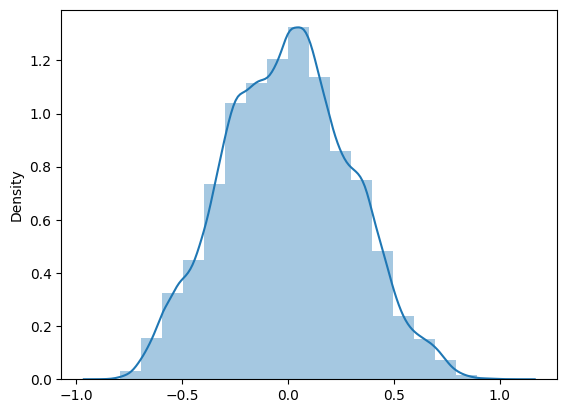

In [32]:
#Checking for normality.

residuals = y_train.values - y_train_pred.values.reshape(-1, 1)
sns.distplot(residuals, bins = 20)
plt.show()

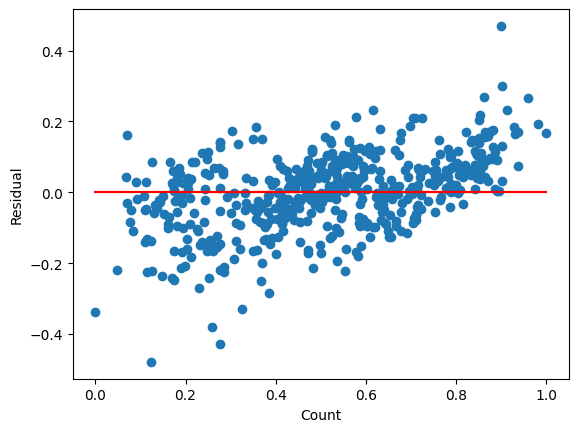

In [33]:
residual = y_train - y_train_pred
plt.scatter(y_train, residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

## Performing prediction on the Test Data

### Preparing the test data for the model.

In [34]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Light_snowrain', 'Misty', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'sep', 'spring', 'summer', 'winter'],
      dtype='object')

In [37]:
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light_snowrain,Misty,...,july,june,mar,may,nov,oct,sep,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,1,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,0,1,0,0,0,0,0,0,1,0


In [38]:
y_test = df_test.pop('cnt')
X_test = df_test

In [39]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Light_snowrain,Misty,mon,...,july,june,mar,may,nov,oct,sep,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,1,1,...,1,0,0,0,0,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0,0,0,...,0,1,0,0,0,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,1,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [40]:
# Fiting the test data on the prior trainned model.
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

In [42]:
#obtaining predictions based on the test data.
y_pred = lm.predict(X_test_new)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7281

## Model Evaluation.

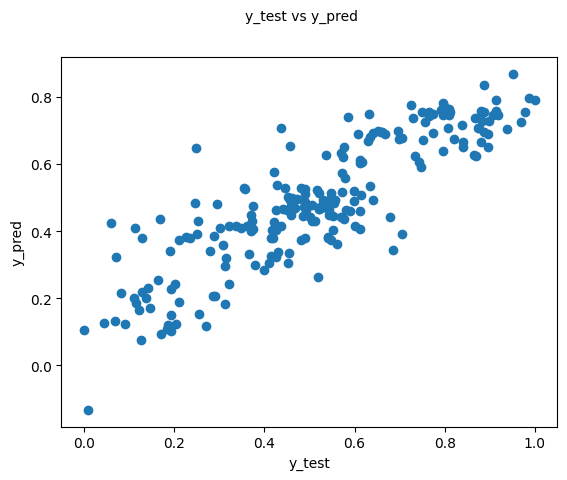

In [49]:
fig=plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=10)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()

We can observe the pattern of a straight line on the model here.

In [51]:
#Obtainig the R2 score of the model.
print(f'R2 score for the model on Test Data is : {r2_score(y_test.values.reshape(-1), y_pred)}')

R2 score for the model on Test Data is : 0.728149722320141


In [52]:
# Model structure/interpretation in terms of a straight line.
print('cnt = \n' + ' + \n'.join([f'({round(coef, 2)} * {column})' for column, coef in zip(lm.params.index, lm.params.values)]))

cnt = 
(0.51 * const) + 
(0.25 * yr) + 
(0.06 * workingday) + 
(-0.19 * windspeed) + 
(-0.3 * Light_snowrain) + 
(-0.09 * Misty) + 
(0.06 * sat) + 
(0.09 * sep) + 
(-0.27 * spring) + 
(-0.05 * winter)


In [55]:
# Calculating R2 for training Dataset
test_r2 = round(r2_score(y_test, y_pred), 4)
test_r2

0.7281

In [56]:
# Calculating R2 for training Dataset
test_ar2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
test_ar2

0.7279

### Comparison between training and test dataset


*   Training R2: 0.7641
*   Trainig Adjusted R2: 0.7498
*   Test R2: 0.7281
*   Test Adjusted R2: 0.7279



In [57]:
round(lm.params,4)

const             0.5129
yr                0.2480
workingday        0.0567
windspeed        -0.1866
Light_snowrain   -0.3004
Misty            -0.0949
sat               0.0644
sep               0.0892
spring           -0.2736
winter           -0.0522
dtype: float64

In [58]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1